# CI280 - Final Project - Part B
#
# Data Preparation, Sort, Groupby and Plot( 100 pts)

## Name:  Alejandro Blancas
## Student ID: 20319

In [530]:
%matplotlib inline
import datetime
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [531]:
df = pd.read_csv('data//covid-data.csv')

In [532]:
# limiting the display rows
pd.set_option('display.max_rows', 5)
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.00,2.00,nan,nan,0.00,nan,...,35973.78,nan,nan,11.62,nan,nan,nan,nan,76.29,nan
1,ABW,North America,Aruba,2020-03-19,nan,nan,0.29,nan,nan,0.00,...,35973.78,nan,nan,11.62,nan,nan,nan,nan,76.29,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56319,NaN,NaN,International,2020-11-11,696.00,nan,nan,7.00,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
56320,NaN,NaN,International,2020-11-12,696.00,nan,nan,7.00,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [510]:
df = df[ (df['location'] != 'World') ]
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,NaN,0.0,NaN,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56319,NaN,NaN,International,2020-11-11,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56320,NaN,NaN,International,2020-11-12,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
# Show number of records 
import random
number = random.randint(0,10000)
print("Alejandro Blancas , ID:20319 ", number )
print('------------------------------')

print("Number of records:", len(df))
df

Alejandro Blancas , ID:20319  4679
------------------------------
Number of records: 56003


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,NaN,0.0,NaN,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56319,NaN,NaN,International,2020-11-11,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56320,NaN,NaN,International,2020-11-12,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## C) Handing Missing Data and Ploting (20 pts)

### use isnull() vs. notnull()
### use dropna
### use replacena

In [109]:
# show last five rows
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
56316,NaN,NaN,International,2020-11-08,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56317,NaN,NaN,International,2020-11-09,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56318,NaN,NaN,International,2020-11-10,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56319,NaN,NaN,International,2020-11-11,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56320,NaN,NaN,International,2020-11-12,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
# show the number of rows and columns of datafram 
df.shape
number = random.randint(0,10000)
print("Alejandro Blancas , ID:20319 ", number )
print('------------------------------')

# 1) Show the number records of miss data for continent ( 2 pts)
#    Show the the last five those records 
total = df.continent
print('The number records missing data for continent',total.isnull().sum())
df.tail()


Alejandro Blancas , ID:20319  8624
------------------------------
The number records missing data for continent 318


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
56316,NaN,NaN,International,2020-11-08,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56317,NaN,NaN,International,2020-11-09,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56318,NaN,NaN,International,2020-11-10,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56319,NaN,NaN,International,2020-11-11,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56320,NaN,NaN,International,2020-11-12,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
number = random.randint(0,10000)
print("Alejandro Blancas , ID:20319 ", number )
print('------------------------------')
# 2-3) Show the number records of miss data for continent and iso_code (2 pts)
#    Show the the last five those records ( 2 pts)
total = df.continent
print('The number records missing data for continent and iso_code \n',total.isnull().sum())
df.tail()

You name , id:  3380
------------------------------
The number records missing data for continent and iso_code 
 318


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
56316,NaN,NaN,International,2020-11-08,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56317,NaN,NaN,International,2020-11-09,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56318,NaN,NaN,International,2020-11-10,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56319,NaN,NaN,International,2020-11-11,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56320,NaN,NaN,International,2020-11-12,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
number = random.randint(0,10000)
print("Alejandro Blancas , ID:20319 ", number )
print('------------------------------')
# 4-5) For the records for Brazil, which columns has missing data (4 pts)
res = df[df['location']=='Brazil']
res

#col_names = res.columns
#col_names

#print('The following columns are missing data for Canada',)






Alejandro Blancas , ID:20319  3997
------------------------------


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
7202,BRA,South America,Brazil,2019-12-31,NaN,0.0,NaN,NaN,0.0,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759
7203,BRA,South America,Brazil,2020-01-01,NaN,0.0,NaN,NaN,0.0,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7518,BRA,South America,Brazil,2020-11-11,5664115.0,10554.0,14009.429,162397.0,128.0,271.571,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759
7519,BRA,South America,Brazil,2020-11-12,5675032.0,10917.0,12143.857,162628.0,231.0,217.429,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759


In [163]:
number = random.randint(0,10000)
print("Alejandro Blancas , ID:20319 ", number )
print('------------------------------')
# .dropna() vs. . dropna(how='all')

# 6) Show the result after droping rows which have at least one NaN data in the dataset ()  (2 pts)
res = df.dropna().sum().sum()
print("After using .dropna(), total records: \n",res)







Alejandro Blancas , ID:20319  8821
------------------------------
After using .dropna(), total records: 
 0.0


In [181]:
number = random.randint(0,10000)
print("Alejandro Blancas , ID:20319 ", number )
print('------------------------------')
# 7) Show the result after after droping rows which all data is NaN in the dataset ()  (2 pts)
res = df.dropna(how='all').count().max()
print("After using .dropna(how='all'), total records:\n",res)






Alejandro Blancas , ID:20319  4517
------------------------------
After using .dropna(how='all'), total records:
 56003


In [187]:
number = random.randint(0,10000)
print("Alejandro Blancas , ID:20319 ", number )
print('------------------------------')

print(df.shape)
print('Original row number:', len(df))

# 8) Show the result after dropping the rows which continent or iso data is missing in the dataset
#    How many rows are dropped. (2 pts)

new_num = df.dropna(subset=['iso_code','continent']).count().max()
print('New dataset included record number:',new_num)
num_drop = len(df) - new_num
print('Number of rows dropped:',num_drop)




Alejandro Blancas , ID:20319  1371
------------------------------
(56003, 49)
Original row number: 56003
New dataset included record number: 55685
Number of rows dropped: 318


In [188]:
res = df[df['location']=='Brazil']
res[['location','handwashing_facilities']]

,location,handwashing_facilities
7202,Brazil,NaN
7203,Brazil,NaN
...,...,...
7518,Brazil,NaN
7519,Brazil,NaN


In [215]:
# 9) Show Brazil's handwashing_facilities information
#    Show the average of handwashing_facilities of worldwide level
import random
number = random.randint(0,10000)
print("Alejandro Blancas , ID:20319 ", number )
print('------------------------------')

#print(df['handwashing_facilities'].describe())

print("Handwashing_facilities values are missing in Brazil")
res = df[df['location']=='Brazil']
print(len(res))
mean = df['handwashing_facilities'].mean()
print('Average of handwashing_facilities of worldwide is:',math.ceil(mean))
res[['location','date','handwashing_facilities']]

Alejandro Blancas , ID:20319  7879
------------------------------
Handwashing_facilities values are missing in Brazil
318
Average of handwashing_facilities of worldwide is: 53


,location,date,handwashing_facilities
7202,Brazil,2019-12-31,NaN
7203,Brazil,2020-01-01,NaN
...,...,...,...
7518,Brazil,2020-11-11,NaN
7519,Brazil,2020-11-12,NaN


In [227]:
pd.options.mode.chained_assignment = None
number = random.randint(0,10000)
print("Alejandro Blancas , ID:20319 ", number )
print('------------------------------')

# 10) Replace handwashing_facilities in Brazil as the average of worldwide level (2 pts)
df['handwashing_facilities'] = df['handwashing_facilities'].fillna(53)
res = df[df['location']=='Brazil']
res[['location','date','handwashing_facilities']]

Alejandro Blancas , ID:20319  8138
------------------------------


,location,date,handwashing_facilities
7202,Brazil,2019-12-31,53.0
7203,Brazil,2020-01-01,53.0
...,...,...,...
7518,Brazil,2020-11-11,53.0
7519,Brazil,2020-11-12,53.0


# D) Sorting, Grouping and Plotting (30 points) 

## df.sort_values(by=['a','b'], ascending = True)
## df.sort_index()
## df.groupby( )

In [277]:
number = random.randint(0,10000)
print("Alejandro Blancas , ID:20319 ", number )
print('------------------------------')
import matplotlib.pyplot as plt

# 1)  (3 pts) Find the top 10 countries which have the most covid cases

# Group all cases by location , become series
res1 = data.groupby(df.location).new_cases.sum()
res2 = cases.sort_values(ascending = False).head(10)
print('10 countries which have the most covid cases \n Country \t Covid Cases')
print('--------------------------------------------')
print(res2)



Alejandro Blancas , ID:20319  4574
------------------------------
10 countries which have the most covid cases 
 Country 	 Covid Cases
--------------------------------------------
location
United States    10401132.0
India             8683916.0
                    ...    
Colombia          1165326.0
Italy             1028424.0
Name: new_cases, Length: 10, dtype: float64


Alejandro Blancas , ID:20319  6235
------------------------------


Text(0.5, 1.0, 'Top population for 10 countries')

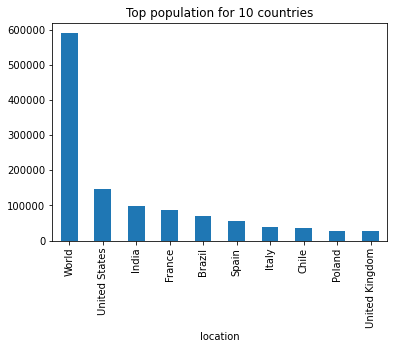

In [534]:
number = random.randint(0,10000)
print("Alejandro Blancas , ID:20319 ", number )
print('------------------------------')
# 2) Use bar chart to show the top 10 countries which have the most covid cases. (3 pts)
res1 = df['new_cases'].groupby(df.location).max().nlargest(10)
total = df.sort_values(by=['location'])
res1.plot(kind='bar')
plt.title('Top population for 10 countries')

Alejandro Blancas , ID:20319  2952
------------------------------


Text(0.5, 0, 'date')

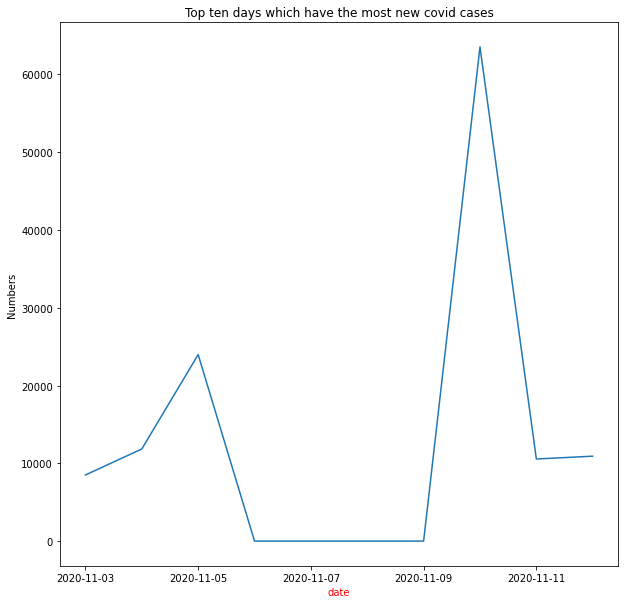

In [396]:
number = random.randint(0,10000)
print("Alejandro Blancas , ID:20319 ", number )
print('------------------------------')

# (3  pts)
# 3) Show worldwide, which ten day has the most new cases? 
res1 = data['new_cases'].groupby(data.date).sum().tail(10)
res1.head(10)
#    Use line chart to show the top 10 days which have the most new covid cases 
res1.plot(kind='line')
plt.title('Top ten days which have the most new covid cases')
plt.ylabel('Numbers')
plt.xlabel('date',color = 'r',fontsize='medium')

You name , id:  4186
------------------------------
On 2020-11-30
10 countries which have the most covid cases on 2020-11-30
Country              covid cases
------------------------------------------------
United States        	 157901
Turkey               	 31219
India                	 31118
Russia               	 26046
Brazil               	 21138
Spain                	 19979
Italy                	 16376
Germany              	 14221
Iran                 	 13321
United Kingdom       	 12428


<BarContainer object of 10 artists>

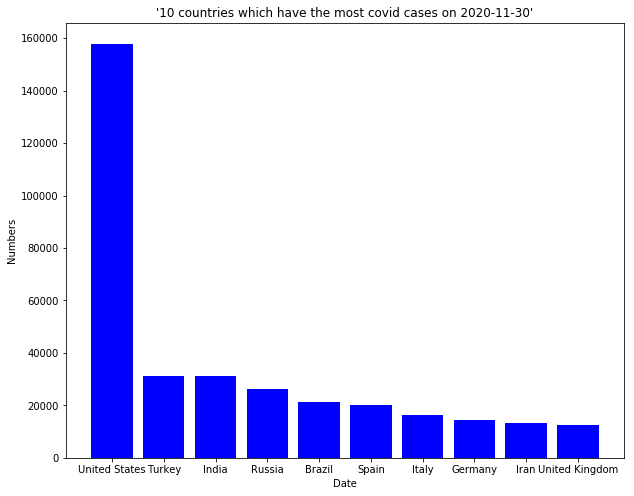

In [21]:
number = random.randint(0,10000)
print("Alejandro Blancas , ID:20319 ", number )
print('------------------------------')
# (3  pts) (unable to complete, don't have the data for this)

# 4) On 2020-11-30, which ten countries has the most new cases? 

#    Use bar chart to show the top 10 location which have the most new covid cases 

# Draw bar chart

In [424]:
number = random.randint(0,10000)
print("Alejandro Blancas , ID:20319 ", number )
print('------------------------------')

# (3  pts) #unable to complete
#  5)  Show last seven days, the new cases in Brazil/US/India/Russia (Chose one country),
#  Plot a line chart


Alejandro Blancas , ID:20319  6860
------------------------------


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
54467,WLF,Oceania,Wallis and Futuna,2020-11-12,1.0,0.0,0.000,NaN,0.0,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.94,NaN
54711,OWID_KOS,Europe,Kosovo,2020-11-12,26121.0,733.0,653.714,777.0,4.0,9.000,...,9795.834,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56002,OWID_WRL,NaN,World,2020-11-12,52143259.0,558909.0,560909.429,1284610.0,9752.0,8243.714,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,NaN
56320,NaN,NaN,International,2020-11-12,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Alejandro Blancas , ID:20319  8031
------------------------------
Total covid new cases by Continent
 continent
Africa          13944.00
Asia            97894.00
                  ...   
Oceania          1384.00
South America   69074.00
Name: new_cases, Length: 6, dtype: float64


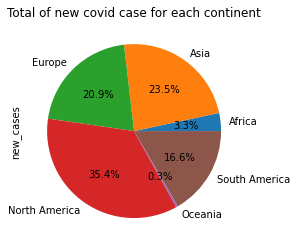

In [516]:
number = random.randint(0,10000)
print("Alejandro Blancas , ID:20319 ", number )
print('------------------------------')

# 6-7) Group by contient, show total of new covid cases for each contient and sorted by total number
#    Plot the result by pie chart (3 pts)
res = df['new_cases'].groupby(df.continent).max()
total = df.sort_values(by=['total_cases'])
print('Total covid new cases by Continent\n',res)
res.plot(kind='pie',autopct='%1.1f%%',title = 'Total of new covid case for each continent')

In [514]:
pd.set_option('display.float_format',lambda x: '%.2f' %x)

Alejandro Blancas , ID:20319  5110
------------------------------
Top 10 countries by Population
 location
China    1439323774.00
India    1380004385.00
              ...     
Russia    145934460.00
Mexico    128932753.00
Name: population, Length: 10, dtype: float64


Text(0.5, 1.0, 'Top population for 10 countries')

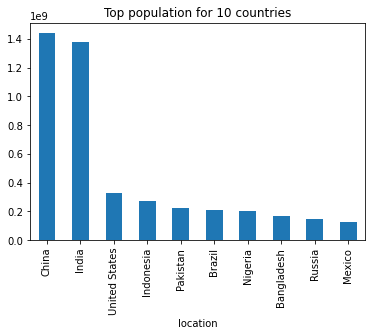

In [515]:
number = random.randint(0,10000)
print("Alejandro Blancas , ID:20319 ", number )
print('------------------------------')

# 8) Show the top 10 countries which have the most population  (3 pts)
res = df['population'].groupby(df.location).max().nlargest(10)
total = df.sort_values(by=['population'])
print('Top 10 countries by Population\n',res)
res.plot(kind='bar')
plt.title('Top population for 10 countries')

Alejandro Blancas , ID:20319  6527
------------------------------
Covid new cases of percentages by Continent
 continent
Asia            1439323774.00
North America    331002647.00
                     ...     
Europe           145934460.00
Oceania           25499881.00
Name: population, Length: 6, dtype: float64


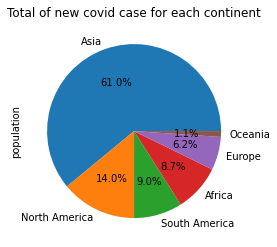

In [519]:
number = random.randint(0,10000)
print("Alejandro Blancas , ID:20319 ", number )
print('------------------------------')

# 9-10) Show the world poplation
#      Show the  population by each continent and show it as pie chart (6 pts)
res = df['population'].groupby(df.continent).max().nlargest(10)
total = df.sort_values(by=['population'])
print('Covid new cases of percentages by Continent\n',res)
res.plot(kind='pie',autopct='%1.1f%%',title = 'Total of new covid case for each continent')


